# Full Analysis
This file runs all analyses associated with project group 13's dataset. To clarify, the research questions are as follows:\
Shalini: (RESEARCH QUESTION HERE)\
Rhys: How does substance type correlate to event type? (i.e., how do opioids and stimulants compare regarding event types?)

In [2]:
# importing libraries and functions
#to ignore the pandas library error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#paths
import os
import sys
sys.path.append('..')

#our function & profile reports
from pandas_profiling import ProfileReport
from scripts import project_functions as pf 

## Rhys' Analysis
Substance use and event types:

In [3]:
#load dataset and check head
df_s = pf.load_process_data('../../data/raw/SubstanceHarmsData.csv')
#print(df_s.head())

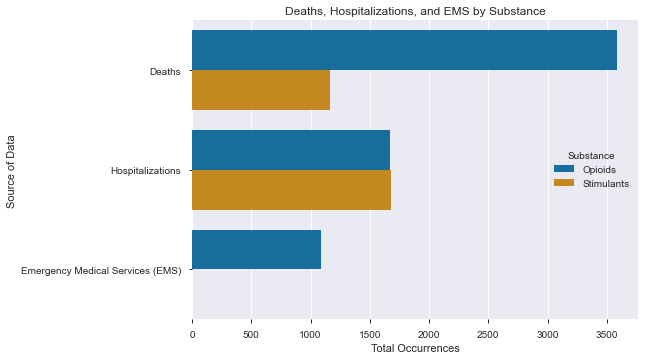

In [4]:
#Comparing substance vs. TOTAL hospitalizations and deaths
#note: for substance, 1 = Opioids, 2 = stimulants
# EMS data is unavailable for stimulants

plt.figure()
source_counts = sns.countplot(data=df_s,y="Source",hue="Substance",palette="colorblind")
source_counts.set_title("Deaths, Hospitalizations, and EMS by Substance")
source_counts.set_xlabel("Total Occurrences")
source_counts.set_ylabel("Source of Data")
source_counts.legend(title="Substance",labels=["Opioids","Stimulants"])

plt.show()

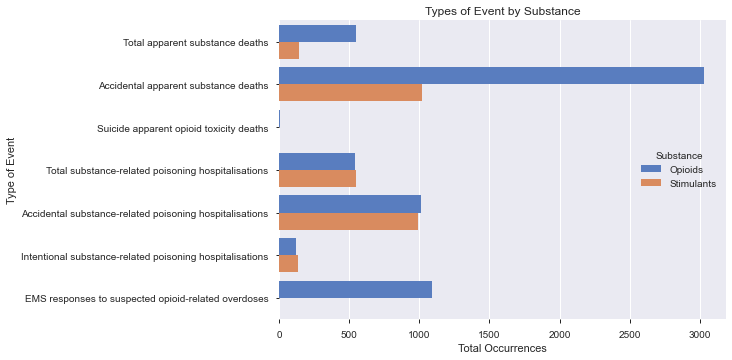

In [5]:
#comparing all event types by substance
#combining event types (total/accidental/intentional deaths/hospitalisations)
df_e = df_s
df_e["Type of Event"] = df_e["Type of Event"].replace(["Total apparent opioid toxicity deaths","Total apparent stimulant toxicity deaths"],"Total apparent substance deaths")
df_e["Type of Event"] = df_e["Type of Event"].replace(["Accidental apparent opioid toxicity deaths","Accidental apparent stimulant toxicity deaths"],"Accidental apparent substance deaths")
df_e["Type of Event"] = df_e["Type of Event"].replace(["Total opioid-related poisoning hospitalizations","Total stimulant-related poisoning hospitalizations"],"Total substance-related poisoning hospitalisations")
df_e["Type of Event"] = df_e["Type of Event"].replace(["Accidental opioid-related poisoning hospitalizations","Accidental stimulant-related poisoning hospitalizations"],"Accidental substance-related poisoning hospitalisations")
df_e["Type of Event"] = df_e["Type of Event"].replace(["Intentional opioid-related poisoning hospitalizations","Intentional stimulant-related poisoning hospitalizations"],"Intentional substance-related poisoning hospitalisations")

# plotting
plt.figure()
ev_plt = sns.countplot(data=df_e,y="Type of Event",hue="Substance",palette="muted")
ev_plt.set_title("Types of Event by Substance")
ev_plt.set_xlabel("Total Occurrences")
ev_plt.set_ylabel("Type of Event")
ev_plt.legend(title="Substance",labels=["Opioids","Stimulants"])

plt.show()

### Comments Regarding Substance Use and Event Types
Two groupings were used to provide information regarding the correlation between substances and medical events. First, we see summaries of deaths, hospitalizations, and EMS responses by the type of substance. From this graph (which has no information for stimulant EMS responses), we can see that despite comparable levels of hospitalizations, opioids account for more than double the amount of deaths recorded.\
\
From the second chart, we can see the consistency regarding substance use and death. However, from this chart we can see that the vast majority of accidental apparent substance deaths occur with opioid usage. From this, we can tailor any future analyses and perhaps explore the role of opioids in accidental poisonings more closely. 